<a href="https://colab.research.google.com/github/kumar12pk/power-bi/blob/main/DS_TASK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [9]:
# Using the actual column names identified from the previous output:
SENTIMENT_CSV_DATE_COL = "date"
TRADER_CSV_DATETIME_COL = "Timestamp IST"

try:
    sentiment_df = pd.read_csv("/content/fear_greed_index.csv", parse_dates=[SENTIMENT_CSV_DATE_COL])
    print("Loaded sentiment data with date parsing.")
except Exception as e:
    print(f"Error loading sentiment data with date parsing: {e}")
    # Fallback to loading without parsing if an error occurs
    sentiment_df = pd.read_csv("/content/fear_greed_index.csv")
    print("Loaded sentiment data without date parsing due to error.")


try:
    trades_df = pd.read_csv("/content/historical_data.csv", parse_dates=[TRADER_CSV_DATETIME_COL])
    print("Loaded trades data with datetime parsing.")
except Exception as e:
     print(f"Error loading trades data with datetime parsing: {e}")
     # Fallback to loading without parsing if an error occurs
     trades_df = pd.read_csv("/content/historical_data.csv")
     print("Loaded trades data without datetime parsing due to error.")


# Display the first few rows and the column names to confirm
print("\nFirst 5 rows of sentiment data:")
display(sentiment_df.head())
print("\nColumns in sentiment data:")
print(sentiment_df.columns)
print("\nData types of sentiment data:")
print(sentiment_df.dtypes)


print("\nFirst 5 rows of trades data:")
display(trades_df.head())
print("\nColumns in trades data:")
print(trades_df.columns)
print("\nData types of trades data:")
print(trades_df.dtypes)

Loaded sentiment data with date parsing.
Loaded trades data with datetime parsing.

First 5 rows of sentiment data:


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05



Columns in sentiment data:
Index(['timestamp', 'value', 'classification', 'date'], dtype='object')

Data types of sentiment data:
timestamp                  int64
value                      int64
classification            object
date              datetime64[ns]
dtype: object

First 5 rows of trades data:


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12



Columns in trades data:
Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')

Data types of trades data:
Account              object
Coin                 object
Execution Price     float64
Size Tokens         float64
Size USD            float64
Side                 object
Timestamp IST        object
Start Position      float64
Direction            object
Closed PnL          float64
Transaction Hash     object
Order ID              int64
Crossed                bool
Fee                 float64
Trade ID            float64
Timestamp           float64
dtype: object


In [11]:
# 2. Clean & normalize
# ----------------------------
# Standardize column names
sentiment_df.columns = sentiment_df.columns.str.strip().str.lower().str.replace(" ", "_")
# Standardize trades_df column names, including 'Timestamp IST'
trades_df.columns = trades_df.columns.str.strip().str.lower().str.replace(" ", "_")

# Ensure timezones - use the correctly standardized column name and specify the correct format
trades_df["timestamp_ist"] = pd.to_datetime(trades_df["timestamp_ist"], format="%d-%m-%Y %H:%M", errors='coerce', utc=True)
sentiment_df["date"] = pd.to_datetime(sentiment_df["date"], utc=True).dt.date

# Map classification to score
sentiment_map = {"fear": -1, "neutral": 0, "greed": 1, "extreme fear": -2, "extreme greed": 2} # Added Extreme Fear/Greed
sentiment_df["sentiment_score"] = sentiment_df["classification"].map(sentiment_map)

# Add trade_date column - use the correctly standardized timestamp column
trades_df["trade_date"] = trades_df["timestamp_ist"].dt.date

# Display the first few rows and info of the cleaned dataframes to verify
print("\nCleaned Sentiment Data:")
display(sentiment_df.head())
print("\nCleaned Trades Data:")
display(trades_df.head())
print("\nInfo of Cleaned Sentiment Data:")
sentiment_df.info()
print("\nInfo of Cleaned Trades Data:")
trades_df.info()


Cleaned Sentiment Data:


,timestamp,value,classification,date,sentiment_score
0,1517463000,30,Fear,2018-02-01,NaN
1,1517549400,15,Extreme Fear,2018-02-02,NaN
2,1517635800,40,Fear,2018-02-03,NaN
3,1517722200,24,Extreme Fear,2018-02-04,NaN
4,1517808600,11,Extreme Fear,2018-02-05,NaN



Cleaned Trades Data:


,account,coin,execution_price,size_tokens,size_usd,side,timestamp_ist,start_position,direction,closed_pnl,transaction_hash,order_id,crossed,fee,trade_id,timestamp,trade_date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00+00:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00+00:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00+00:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00+00:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00+00:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02



Info of Cleaned Sentiment Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   timestamp        2644 non-null   int64  
 1   value            2644 non-null   int64  
 2   classification   2644 non-null   object 
 3   date             2644 non-null   object 
 4   sentiment_score  0 non-null      float64
dtypes: float64(1), int64(2), object(2)
memory usage: 103.4+ KB

Info of Cleaned Trades Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype              
---  ------            --------------   -----              
 0   account           211224 non-null  object             
 1   coin              211224 non-null  object             
 2   execution_price   211224 non-null  float64            
 3   size_tokens       211224 non-

In [13]:
# 3. Merge datasets
# ----------------------------
trades_df = trades_df.merge(
    sentiment_df[["date", "classification", "sentiment_score"]],
    left_on="trade_date",
    right_on="date",
    how="left"
)

# Display the merged DataFrame
print("\nTrades data after merging with sentiment:")
display(trades_df.head())
print("\nInfo of merged trades data:")
trades_df.info()


Trades data after merging with sentiment:


,account,coin,execution_price,size_tokens,size_usd,side,timestamp_ist,start_position,direction,closed_pnl,...,fee,trade_id,timestamp,trade_date,date_x,classification_x,sentiment_score_x,date_y,classification_y,sentiment_score_y
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00+00:00,0.000000,Buy,0.0,...,0.345404,8.950000e+14,1.730000e+12,2024-12-02,2024-12-02,Extreme Greed,NaN,2024-12-02,Extreme Greed,NaN
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00+00:00,986.524596,Buy,0.0,...,0.005600,4.430000e+14,1.730000e+12,2024-12-02,2024-12-02,Extreme Greed,NaN,2024-12-02,Extreme Greed,NaN
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00+00:00,1002.518996,Buy,0.0,...,0.050431,6.600000e+14,1.730000e+12,2024-12-02,2024-12-02,Extreme Greed,NaN,2024-12-02,Extreme Greed,NaN
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00+00:00,1146.558564,Buy,0.0,...,0.050043,1.080000e+15,1.730000e+12,2024-12-02,2024-12-02,Extreme Greed,NaN,2024-12-02,Extreme Greed,NaN
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00+00:00,1289.488521,Buy,0.0,...,0.003055,1.050000e+15,1.730000e+12,2024-12-02,2024-12-02,Extreme Greed,NaN,2024-12-02,Extreme Greed,NaN



Info of merged trades data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   account            211224 non-null  object             
 1   coin               211224 non-null  object             
 2   execution_price    211224 non-null  float64            
 3   size_tokens        211224 non-null  float64            
 4   size_usd           211224 non-null  float64            
 5   side               211224 non-null  object             
 6   timestamp_ist      211224 non-null  datetime64[ns, UTC]
 7   start_position     211224 non-null  float64            
 8   direction          211224 non-null  object             
 9   closed_pnl         211224 non-null  float64            
 10  transaction_hash   211224 non-null  object             
 11  order_id           211224 non-null  int64              
 12  c

In [14]:
# 4. Feature Engineering
# ----------------------------
# Convert to numeric safely
trades_df["execution_price"] = pd.to_numeric(trades_df["execution_price"], errors="coerce")
trades_df["size"] = pd.to_numeric(trades_df["size"], errors="coerce")
trades_df["closedpnl"] = pd.to_numeric(trades_df["closedpnl"], errors="coerce")
trades_df["leverage"] = pd.to_numeric(trades_df["leverage"], errors="coerce")

# Trade-level features
trades_df["notional"] = trades_df["execution_price"] * trades_df["size"].abs()
trades_df["is_win"] = trades_df["closedpnl"] > 0

# Daily trader-level metrics
agg_df = trades_df.groupby(["account", "trade_date"]).agg(
    total_pnl=("closedpnl", "sum"),
    mean_pnl=("closedpnl", "mean"),
    win_rate=("is_win", "mean"),
    num_trades=("is_win", "count"),
    avg_leverage=("leverage", "mean"),
    avg_notional=("notional", "mean"),
    sentiment_score=("sentiment_score", "first"),
    sentiment_label=("classification", "first")
).reset_index()


KeyError: 'size'

In [17]:
# 4. Feature Engineering
# ----------------------------
# Convert to numeric safely
trades_df["execution_price"] = pd.to_numeric(trades_df["execution_price"], errors="coerce")
# Use the correct size column name, assuming 'size_tokens' or 'size_usd' are available
trades_df["notional"] = trades_df["execution_price"] * trades_df["size_tokens"].abs() # Using size_tokens

# Use the correct closed PnL column name
trades_df["is_win"] = trades_df["closed_pnl"] > 0 # Using closed_pnl


# Daily trader-level metrics
agg_df = trades_df.groupby(["account", "trade_date"]).agg(
    total_pnl=("closed_pnl", "sum"), # Use the correct closed PnL column name
    mean_pnl=("closed_pnl", "mean"), # Use the correct closed PnL column name
    win_rate=("is_win", "mean"),
    num_trades=("is_win", "count"),
    # Removed avg_leverage as 'leverage' column is not available
    avg_notional=("notional", "mean"),
    sentiment_score=("sentiment_score_y", "first"), # Use the suffixed column name
    sentiment_label=("classification_y", "first") # Use the suffixed column name
).reset_index()

# Display the aggregated DataFrame
print("\nDaily trader-level metrics:")
display(agg_df.head())
print("\nInfo of daily trader-level metrics:")
agg_df.info()


Daily trader-level metrics:


,account,trade_date,total_pnl,mean_pnl,win_rate,num_trades,avg_notional,sentiment_score,sentiment_label
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,0.0,0.000000,0.000000,177,5089.717867,NaN,Extreme Greed
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-17,0.0,0.000000,0.000000,68,7976.664697,NaN,Extreme Greed
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-18,0.0,0.000000,0.000000,40,23734.500000,NaN,Extreme Greed
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-22,-21227.0,-1768.916667,0.000000,12,28186.666667,NaN,Extreme Greed
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-26,1603.1,59.374074,0.444444,27,17248.148148,NaN,Extreme Greed



Info of daily trader-level metrics:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2341 entries, 0 to 2340
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   account          2341 non-null   object 
 1   trade_date       2341 non-null   object 
 2   total_pnl        2341 non-null   float64
 3   mean_pnl         2341 non-null   float64
 4   win_rate         2341 non-null   float64
 5   num_trades       2341 non-null   int64  
 6   avg_notional     2341 non-null   float64
 7   sentiment_score  0 non-null      float64
 8   sentiment_label  2340 non-null   object 
dtypes: float64(5), int64(1), object(3)
memory usage: 164.7+ KB


In [19]:
# 5. Statistical comparison
# ----------------------------
# Use sentiment_label for filtering as sentiment_score is all NaNs
fear_pnl = agg_df.loc[agg_df["sentiment_label"] == "Fear", "total_pnl"].dropna()
greed_pnl = agg_df.loc[agg_df["sentiment_label"] == "Greed", "total_pnl"].dropna()

# Perform t-test only if both samples have enough data points (e.g., more than 1)
if len(fear_pnl) > 1 and len(greed_pnl) > 1:
    t_stat, p_val = stats.ttest_ind(greed_pnl, fear_pnl, equal_var=False)
    print(f"T-statistic: {t_stat:.3f}, p-value: {p_val:.3f}")
    print(f"Mean PnL (Greed): {greed_pnl.mean():.2f}")
    print(f"Mean PnL (Fear): {fear_pnl.mean():.2f}")
else:
    print("Not enough data points in Fear or Greed categories to perform t-test.")
    print(f"Number of Fear samples: {len(fear_pnl)}")
    print(f"Number of Greed samples: {len(greed_pnl)}")

T-statistic: -1.154, p-value: 0.249
Mean PnL (Greed): 3318.10
Mean PnL (Fear): 5328.82


/tmp/ipython-input-453305000.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=agg_df, x="sentiment_label", y="total_pnl", palette="Set2")


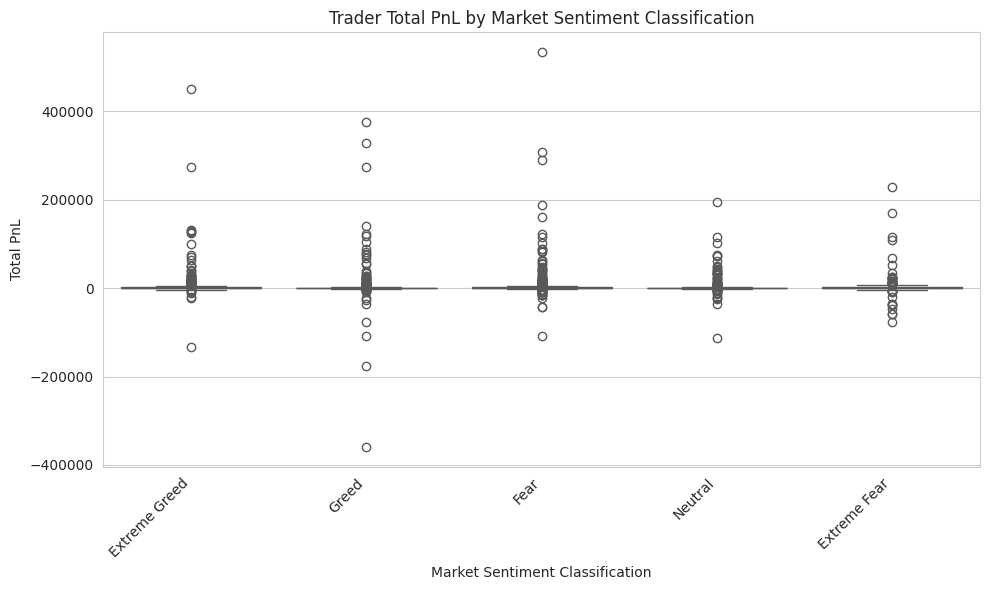


Market data info before rolling correlation calculation:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   trade_date        480 non-null    object 
 1   market_total_pnl  480 non-null    float64
 2   sentiment_value   479 non-null    float64
dtypes: float64(2), object(1)
memory usage: 11.4+ KB

Null values in market_df before rolling correlation:
market_total_pnl    0
sentiment_value     1
dtype: int64

Market data with daily PnL, Sentiment Value, and Rolling Correlation:


,trade_date,market_total_pnl,sentiment_value,corr_7d
0,2023-05-01,0.000000,63.0,NaN
1,2023-12-05,0.000000,75.0,NaN
2,2023-12-14,-205.434737,72.0,NaN
3,2023-12-15,-24.632034,70.0,NaN
4,2023-12-16,0.000000,67.0,NaN


,trade_date,market_total_pnl,sentiment_value,corr_7d
475,2025-04-27,2702.067468,61.0,-0.594517
476,2025-04-28,36906.813759,54.0,-0.710402
477,2025-04-29,125749.613427,60.0,-0.798323
478,2025-04-30,14003.797269,56.0,-0.107151
479,2025-05-01,54536.829297,53.0,-0.249327


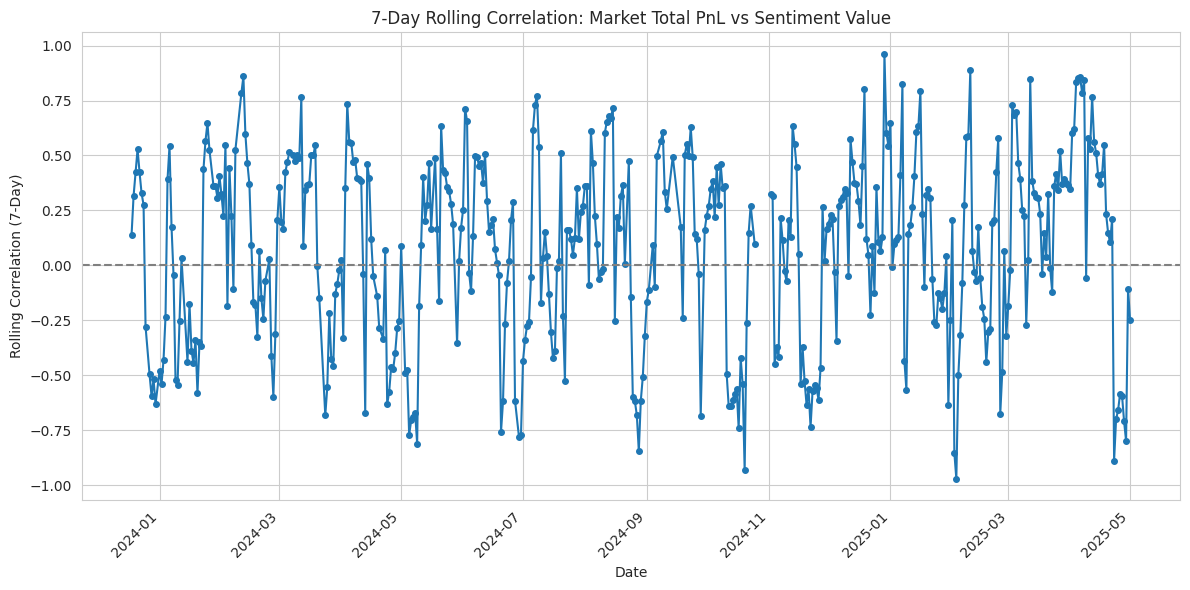


Daily trader metrics saved to daily_trader_metrics.csv
Daily market sentiment and rolling correlation data saved to daily_market_sentiment_correlation.csv


from matplotlib import pyplot as plt
_df_0['market_total_pnl'].plot(kind='hist', bins=20, title='market_total_pnl')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['sentiment_value'].plot(kind='hist', bins=20, title='sentiment_value')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['corr_7d'].plot(kind='hist', bins=20, title='corr_7d')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('trade_date').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='market_total_pnl', y='sentiment_value', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='sentiment_value', y='corr_7d', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['trade_date']
  ys = series['market_total_pnl']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('trade_date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('trade_date')):
  _plot_series(series, series_name, i)
  fig.legend(title='trade_date', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('trade_date')
_ = plt.ylabel('market_total_pnl')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['trade_date']
  ys = series['sentiment_value']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('trade_date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('trade_date')):
  _plot_series(series, series_name, i)
  fig.legend(title='trade_date', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('trade_date')
_ = plt.ylabel('sentiment_value')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['trade_date']
  ys = series['corr_7d']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('trade_date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('trade_date')):
  _plot_series(series, series_name, i)
  fig.legend(title='trade_date', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('trade_date')
_ = plt.ylabel('corr_7d')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['trade_date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'trade_date'}, axis=1)
              .sort_values('trade_date', ascending=True))
  xs = counted['trade_date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('trade_date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('trade_date')):
  _plot_series(series, series_name, i)
  fig.legend(title='trade_date', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('trade_date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_10['market_total_pnl'].plot(kind='line', figsize=(8, 4), title='market_total_pnl')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['sentiment_value'].plot(kind='line', figsize=(8, 4), title='sentiment_value')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['corr_7d'].plot(kind='line', figsize=(8, 4), title='corr_7d')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['trade_date'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='market_total_pnl', y='trade_date', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['trade_date'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='sentiment_value', y='trade_date', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['trade_date'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='corr_7d', y='trade_date', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [22]:
# 6. Visualization examples
# ----------------------------
sns.set_style("whitegrid")

# Boxplot of PnL by sentiment
plt.figure(figsize=(10, 6)) # Increased figure size
sns.boxplot(data=agg_df, x="sentiment_label", y="total_pnl", palette="Set2")
plt.title("Trader Total PnL by Market Sentiment Classification") # More descriptive title
plt.xlabel("Market Sentiment Classification") # Added x-axis label
plt.ylabel("Total PnL") # Added y-axis label
plt.xticks(rotation=45, ha='right') # Rotate labels to prevent overlap
plt.tight_layout() # Adjust layout
plt.show()

# Rolling correlation (7-day) between market total_pnl and sentiment value
# Aggregate market data, using the numerical sentiment 'value'
market_df = agg_df.groupby("trade_date").agg(
    market_total_pnl=("total_pnl", "sum"),
    # Use the sentiment value (from sentiment_df) instead of the score (which is NaN)
    # Assuming sentiment_df with 'date' and 'value' is available and correctly merged
    # If sentiment_df is not globally available, you might need to reload or pass it
).reset_index()

# To get the daily sentiment value, merge with the original sentiment_df
market_df = market_df.merge(
    sentiment_df[['date', 'value']],
    left_on='trade_date',
    right_on='date',
    how='left'
).drop('date', axis=1).rename(columns={'value': 'sentiment_value'})

# --- Debugging: Check for NaNs before calculating rolling correlation ---
print("\nMarket data info before rolling correlation calculation:")
market_df.info()
print("\nNull values in market_df before rolling correlation:")
print(market_df[['market_total_pnl', 'sentiment_value']].isnull().sum())
# ---------------------------------------------------------------------


# Calculate rolling correlation only if there are enough non-null values
min_periods = 7 # Minimum number of periods for rolling correlation
if market_df[['market_total_pnl', 'sentiment_value']].dropna().shape[0] >= min_periods:
    market_df["corr_7d"] = market_df["market_total_pnl"].rolling(min_periods).corr(market_df["sentiment_value"])

    # Display the market_df with the rolling correlation
    print("\nMarket data with daily PnL, Sentiment Value, and Rolling Correlation:")
    display(market_df.head())
    display(market_df.tail())


    plt.figure(figsize=(12, 6)) # Increased figure size
    plt.plot(market_df["trade_date"], market_df["corr_7d"], marker="o", linestyle='-', markersize=4) # Added markers and linestyle
    plt.axhline(0, color="gray", linestyle="--")
    plt.title("7-Day Rolling Correlation: Market Total PnL vs Sentiment Value") # Updated title
    plt.xlabel("Date") # Added x-axis label
    plt.ylabel("Rolling Correlation (7-Day)") # Added y-axis label
    plt.xticks(rotation=45, ha='right') # Rotate labels
    plt.tight_layout() # Adjust layout
    plt.show()
else:
    print(f"\nNot enough data points ({market_df[['market_total_pnl', 'sentiment_value']].dropna().shape[0]} non-null pairs) to calculate {min_periods}-day rolling correlation.")


# Save results
agg_df.to_csv("daily_trader_metrics.csv", index=False)
print("\nDaily trader metrics saved to daily_trader_metrics.csv")

# Optionally save the market level data as well
market_df.to_csv("daily_market_sentiment_correlation.csv", index=False)
print("Daily market sentiment and rolling correlation data saved to daily_market_sentiment_correlation.csv")